<a href="https://colab.research.google.com/github/coder7475/HandWrittenImageClassification_MNIST/blob/main/handwritten_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing needed Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 22s 2us/step


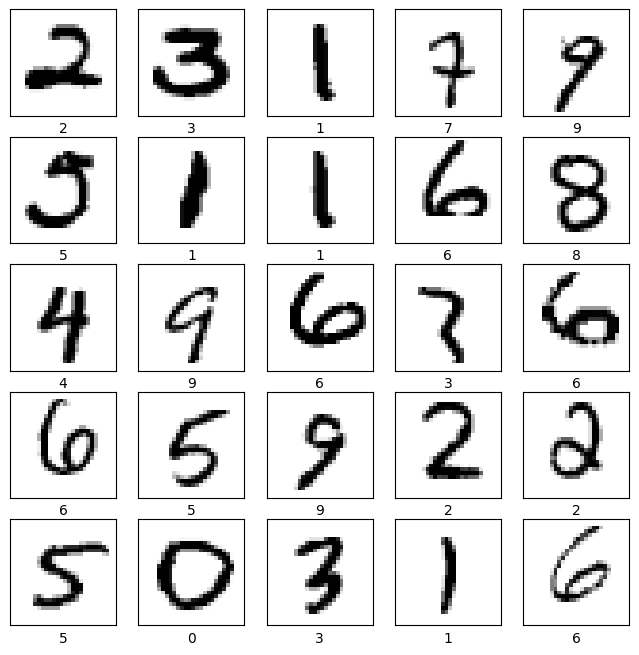

In [3]:
# Show samples of dataset
import random

# Select 25 random images from the training set
num_samples = 25
sample_indexes = random.sample(range(len(x_train)), num_samples)
samples = x_train[sample_indexes]
labels = y_train[sample_indexes]

# Plot the images in a 5x5 grid
plt.figure(figsize=(8,8))
for i in range(num_samples):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()


In [4]:
# Find the size and dimension of dataset images
print(x_train.shape)

(60000, 28, 28)


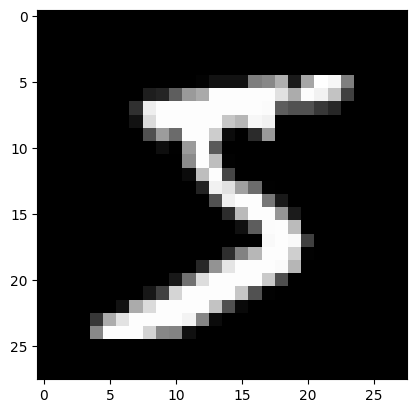

In [6]:
# plot first image
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.show()

In [7]:
#pixel values of image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
# Preprocessing of data - Image value normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# Add the batch dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Updated Model Architecture
model = Sequential([
    # First Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),  # Max Pooling Layer: 2x2 pool size

    # Second Convolutional Layer: 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),  # Max Pooling Layer: 2x2 pool size

    # Third Convolutional Layer: 128 filters, 3x3 kernel, ReLU activation
    Conv2D(128, (3, 3), activation='relu'),

    # Fourth Convolutional Layer: 256 filters, 3x3 kernel, ReLU activation
    Conv2D(256, (3, 3), activation='relu'),

    # Flatten the output
    Flatten(),

    # First Fully Connected Layer: 128 units, ReLU activation
    Dense(128, activation='relu'),

    # Second Fully Connected Layer: 50 units, ReLU activation
    Dense(50, activation='relu'),

    # Third Fully Connected Layer: 50 units, ReLU activation
    Dense(50, activation='relu'),

    # Output Layer: 10 units (for 10 digits), Softmax activation
    Dense(10, activation='softmax')
])

# Print model summary to verify architecture
model.summary()


c:\Users\mdzai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model using appropriate optimizer, loss function and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0568 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0577 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0519 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0522 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0559 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0520 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0507 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.0479 - accuracy: 0.9859
Test accuracy: 0.9858999848365784


In [ ]:
# Save model
model.save('second_model.h5')

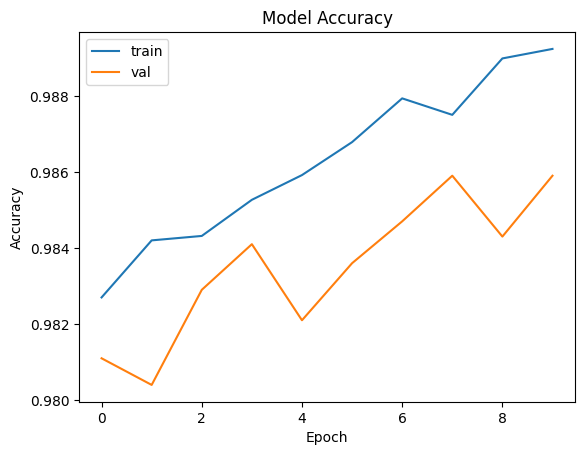

In [ ]:
import matplotlib.pyplot as plt

# Train your model here...

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

